# TECH2 Mandatory assignment 2

## About the mandatory assignment

-   The assignment must be completed individually.
-   You are allowed to use all online resources for help, including generative AI. You must include a statement on how you used AI to solve the tasks.
-   After the assignment deadline, you must perform a peer review of two other students' assignment on Canvas. You're not allowed to use AI to write the peer-review for you.
-   Deadline for the assignment: Friday, October 17, 16:00.
-   Deadline for the peer review: Friday, October 24, 16:00.


## Requirements

-   Your solution needs to be uploaded to GitHub. You should fork the assignment repository at
    [https://github.com/richardfoltyn/TECH2-H25-assignment2](https://github.com/richardfoltyn/TECH2-H25-assignment2)
    and add your solution to this notebook.
-   All commits in your repository must be *prior* to the deadline. 
-   You need to make sure that your GitHub repository is publicly accessible. This can be changed in the GitHub repository setttings, if required.
-   You need to submit the URL to the your GitHub repository on Canvas.
-   Make sure your notebook runs without errors (`Restart` and `Run all`). 
-   Your notebook *must* run with the TECH2 environment we've been using in part 2. You can create this environment from the 
    `environment.yml` file in this repository if you haven't done so earlier.


## Tasks

In this assignment, you are asked to analyze a 10% sub-sample of the Survey of Consumer Finances (SCF), a survey of household portfolios that is representative of the US population. The survey was administered every 3 years from 1989 to 2022. The appendix in this document contains a description of the variables present in this data set (this is a subset; the original SCF contains many more variables).

1.  Data preprocessing

    1.  Read the CSV file `SCF_10pct.csv` stored in this repository.
    2.  Keep only observations where the household head is aged between 25 and 89. 
    3.  Create the column `'college'`, which contains an indicator variable that is 1 when the household head has at least some college (column `'educ'` is 3 or 4), and 0 otherwise.
    4.  Divide the values in the column `'networth'` by 1,000 so that they are reported in thousands of US dollars.
    5.  Report the number of observations in the final sample.

2.  In this part, you're asked to analyze how net worth (total gross assets minus total debt) varies across the four education levels (no high school, high school, some college, 4-year college or more):

    1.  Compute the average net worth (in thousands of US dollars) by education (use a loop).
    2.  Create a bar chart that plots the average net worth by education.

3.  In this part, you're asked to analyze how net worth has changed over the last 3 decades:

    1.  Compute the average net worth (in thousands of US dollars) by survey year (use a loop).
    2.  Create a line plot that shows the evolution of average net worth over the years 1989 to 2022.

4.  Finally, combine the analyses from the previous parts to see how net worth evolved over the years for those with and without college.

    1.  Compute the average net worth (in thousands of US dollars) by survey year, separately for non-college (`college=0`) and the college-educated (`college=1`).
    2.  Create a line plot that shows the evolution of net worth over the years 1989 to 2022 by college status, i.e., your figure should contain two lines, one for college and one for non-college.

Remember to add axis labels, titles, and legends (where applicable) to all your figures.




## Hints

-   The assignment can be solved using the concepts we covered up to and including lecture/workshop 3 on Friday, October 10. 
-   In particular, you don't need `groupby()` which we'll cover later in the course, but you can instead loop over education levels or years, as needed.

There are 32826 observations in the dataframe


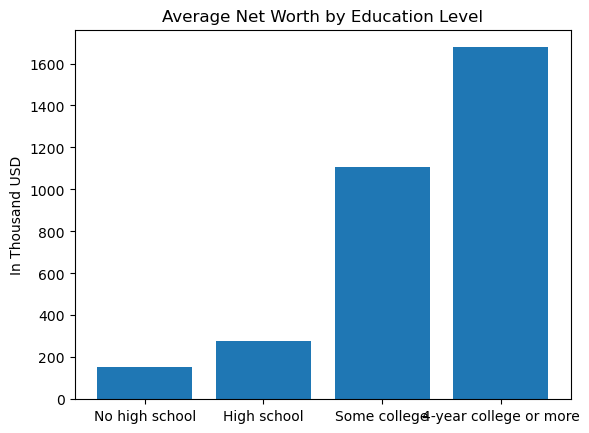

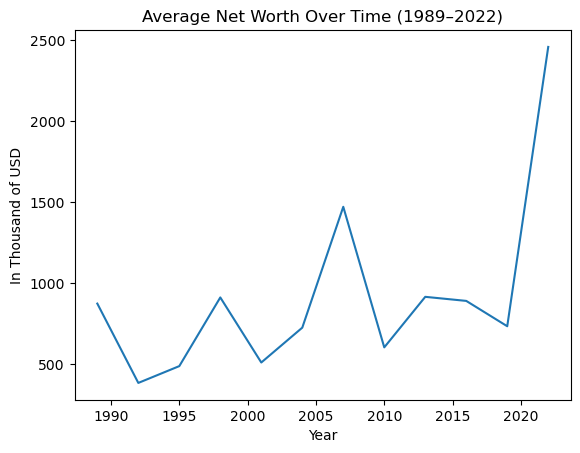

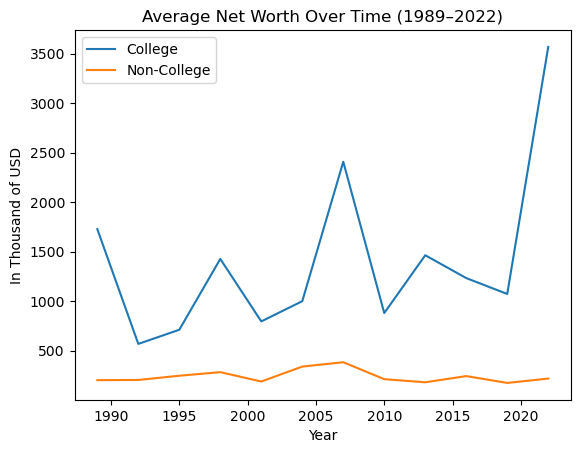

In [84]:
#***
#**WRITE YOUR SOLUTION TO PARTS 1-4 HERE**

import pandas as pd
import matplotlib.pyplot as plt
# Task 1

# Read CSV file to dataframe
file = "SCF_10pct.csv"
df = pd.read_csv(file)

# Keep age column between 25 and 89 years
df = df[(df['age'] >= 25) & (df['age'] <= 89)]

# Create column called college filled with zeros, change value to 1 if education is 3 or 4
df["college"] = 0
condition = (df["educ"] == 3) | (df["educ"] == 4)
df.loc[condition, "college"] = 1

# Dividing networth by 1000
df["networth"]= df["networth"]/1000

# Number of observations determined by Rows times columns
observations = len(df) * len(df.columns)
print(f"There are {observations} observations in the dataframe")

# Task 2

education_labels = {
    1: "No high school",
    2: "High school",
    3: "Some college",
    4: "4-year college or more"
}

# Initialize a dictionary to store the averages
avg_networth_by_edu = {}

# Loop through each education code
for code, label in education_labels.items():
    avg = df.loc[df['educ'] == code, 'networth'].mean()
    avg_networth_by_edu[label] = avg

# Convert to DataFrame for easy plotting
avg_networth_df = pd.DataFrame(list(avg_networth_by_edu.items()), columns=['Education', 'Average_Net_Worth'])

# Bar chart with matplotlib
plt.bar(avg_networth_df['Education'], avg_networth_df["Average_Net_Worth"])
plt.title("Average Net Worth by Education Level")
plt.ylabel('In Thousand USD')
plt.show()

# Task 3 

# Sort years by unique elements
years = sorted(df['year'].unique())
avg_networth_by_year = {}

# loop that iterates trough the years 1989-2022
for y in years:
    avg = df.loc[df['year'] == y, 'networth'].mean()
    avg_networth_by_year[y] = avg

# Data frame for plotting
avg_networth_by_year_df = pd.DataFrame(list(avg_networth_by_year.items()), columns=['Year', 'Average_Net_Worth'])

plt.plot(avg_networth_by_year_df["Year"], avg_networth_by_year_df["Average_Net_Worth"])
plt.title("Average Net Worth Over Time (1989–2022)")
plt.xlabel('Year')
plt.ylabel('In Thousand of USD')
plt.show()

# Task 4

# New dictionaries for both groups
avg_networth_college = {}
avg_networth_noncollege = {}

# loop trough each category
for y in years:
    avg_college = df.loc[(df['year'] == y) & (df['college'] == 1), 'networth'].mean()
    avg_noncollege = df.loc[(df['year'] == y) & (df['college'] == 0), 'networth'].mean()
    
    avg_networth_college[y] = avg_college
    avg_networth_noncollege[y] = avg_noncollege

# Combine into one DataFrame for plotting
avg_networth_df2 = pd.DataFrame({
    'Year': years,
    'College': [avg_networth_college[y] for y in years],
    'Non-College': [avg_networth_noncollege[y] for y in years]
})

# Plot both lines on one graph, with legends     
plt.plot(avg_networth_df2["Year"], avg_networth_df2["College"])
plt.plot(avg_networth_df2["Year"], avg_networth_df2["Non-College"])
plt.title("Average Net Worth Over Time (1989–2022)")
plt.xlabel('Year')
plt.ylabel('In Thousand of USD')
plt.legend(["College", "Non-College"])
plt.show()

# I had to use generative AI to help me code the later questions. Making a for loop to go through the dataframe and check for values was tricky, 
# so I had Chagpt help me code a loop and categorize the data in dictionaries. There was also some operations errors I had trouble solving so I asked AI what the problem was, and how to solve it.


    








***
# Data description

## Variables

| Variable         | Description |
|------------------|-------------|
| id               | Identifier  |
| year             | Survey year |
| age             | Age of reference person (household head) |
| educ            | Education of reference person (1 = no high school/GED, 2 = high school or GED, 3 = some college or Assoc. degree, 4 = Bachelors degree or higher)|
| networth        | Net worth in US dollars |

## Reference

- URL: https://www.federalreserve.gov/econres/scfindex.htm
- DOI Identifier: https://doi.org/10.17016/8799
- Creator: Board of Governors of the Federal Reserve Board
- Name: 2022 Survey of Consumer Finances
- Description:
    The Survey of Consumer Finances (SCF) is normally a triennial cross-sectional survey of U.S. families. The survey data include information on families' balance sheets, pensions, income, and demographic characteristics.
- Publisher: Board of Governors of the Federal Reserve System
- Publication Year: 2023 